# Sarsa vs QLearning

In [1]:
import os
import sys

# Get the absolute path to the parent folder
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the parent folder to sys.path if it's not already included
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from agents.sarsa import Sarsa
from agents.qlearning import QLearning
from policies.eps_greedy_policy import EpsGreedy
from policies.softmax_policy import Softmax

from utils.encoding import mc_tile_encoding
from utils.utils_fct import line_plot, plot_moving_averages, process_json

env = gym.make("MountainCar-v0", render_mode=None)

## 1. $\epsilon$-Greedy agents

In [2]:
eps_greedy_sarsa = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=EpsGreedy(0.005),
    nb_actions=env.action_space.n,
)

eps_greedy_qlearning = QLearning(
    encode_fct=mc_tile_encoding,
    policy=EpsGreedy(0.005),
    nb_actions=env.action_space.n,
)

### 1.1. Training agents

In [3]:
sarsa_rewards = eps_greedy_sarsa.train(
    env=env,
    policy_action_params={},
    policy_update_params={"use_glei": True},
    alpha=0.07,
    gamma=1,
    nb_episodes=3000,
    verbose=1,
)

qlearning_rewards = eps_greedy_qlearning.train(
    env=env,
    policy_action_params={},
    policy_update_params={"use_glei": False},
    alpha=0.07,
    gamma=1,
    nb_episodes=3000,
    verbose=1,
)

Last reward of training -139.0
Last reward of training -138.0


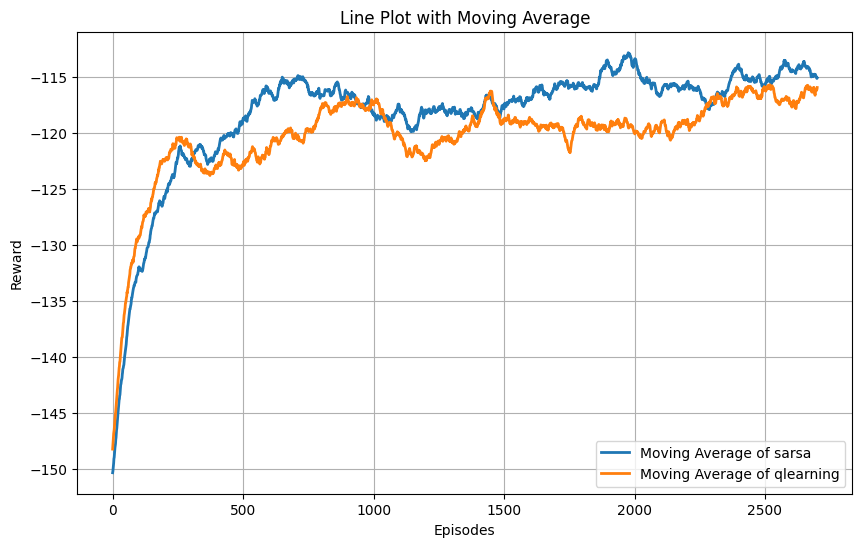

In [ ]:
line_plot(
    data_dict={"sarsa training": sarsa_rewards, "qlearning training": qlearning_rewards},
    window_size=300,
    name="Sarsa",
)

### 1.2. Evaluating agents

## 2. Softmax agents